In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('~/Documents/Uni/Muscles/міометрій_KCl_карбахол.csv', encoding
        ='Windows-1251')
amps = df['канал 1']

In [3]:
dt = 0.1
time = np.arange(0, dt*len(amps), dt)

Time step = **0.1 s**

Stabilization **0-30 minutes**

KCL **31-37 minutes**

Carbacholine **56-62 minutes**

# Visualizing

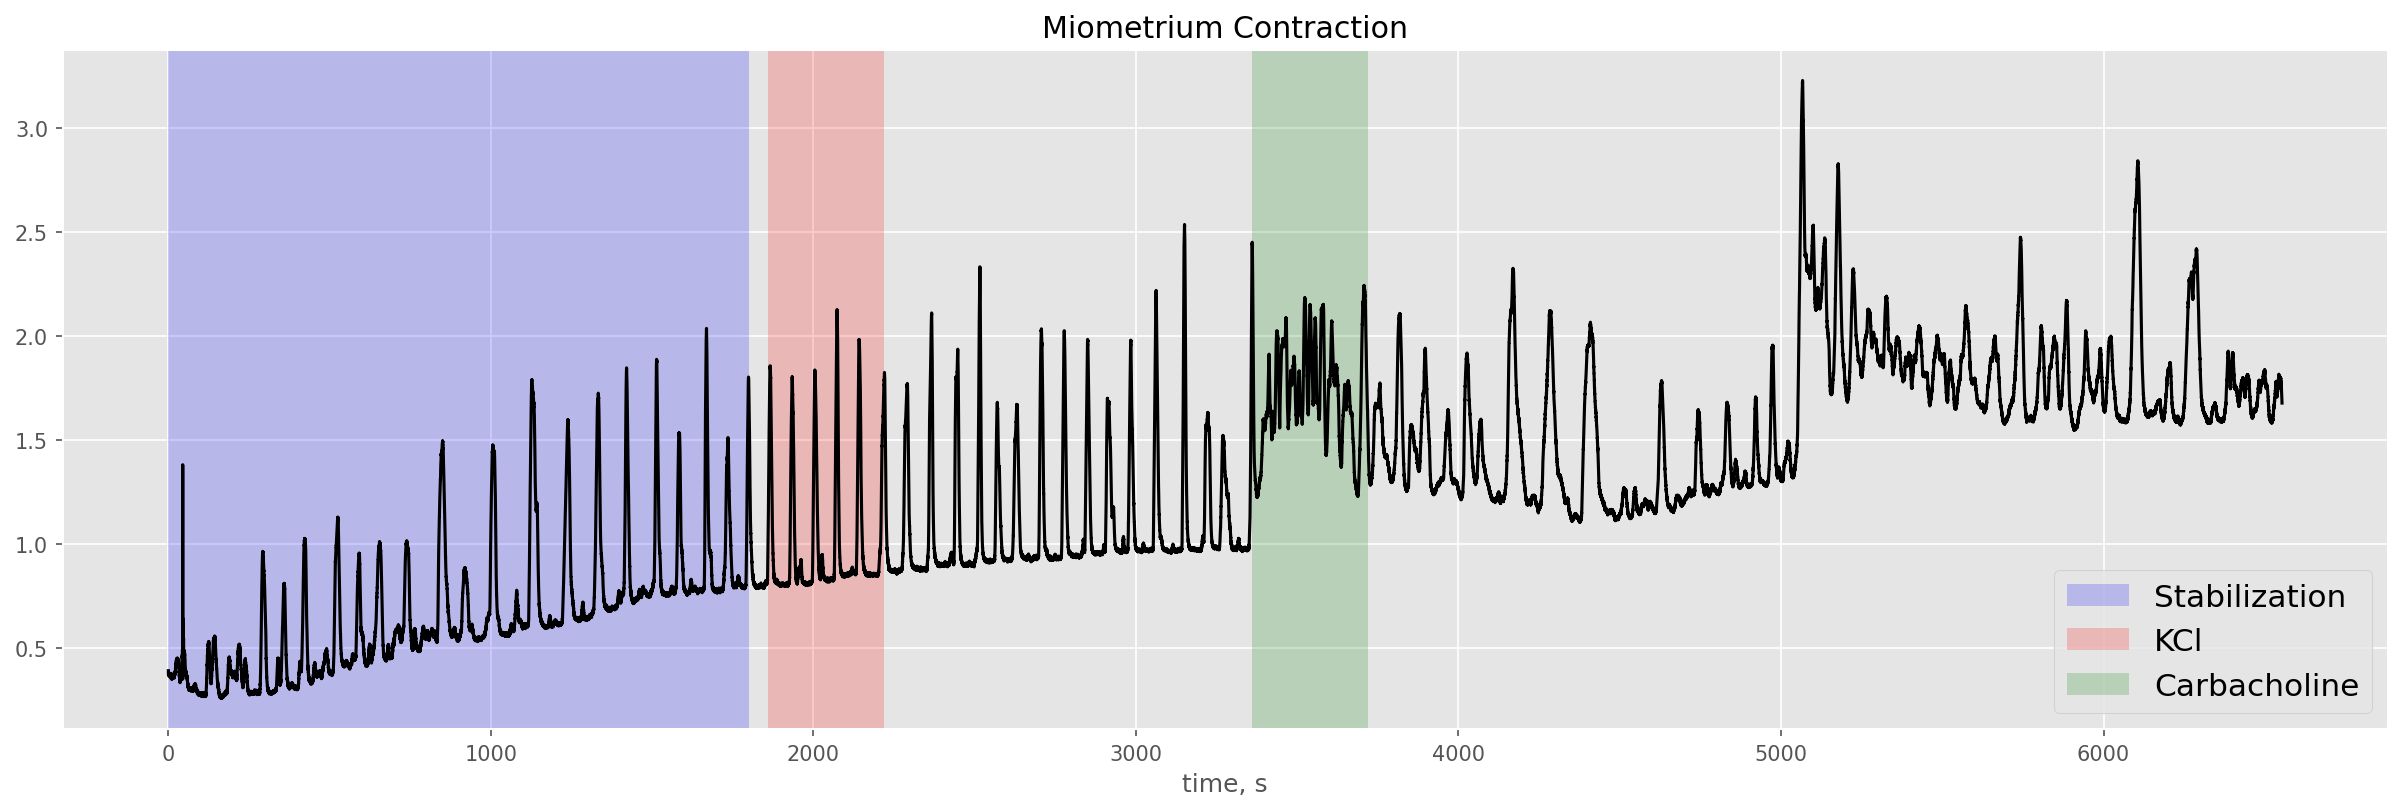

In [4]:
plt.figure(figsize=(20,6), dpi=150)
plt.plot(time, amps, color='k')
plt.title('Miometrium Contraction')
plt.xlabel('time, s')
plt.axvspan(0, 30*60, facecolor='blue', edgecolor='None', 
            alpha=.2, label='Stabilization')
plt.axvspan(31*60, 37*60, facecolor='red', edgecolor='None', 
            alpha=.2, label='KCl')
plt.axvspan(56*60, 62*60, facecolor='green', edgecolor='None', 
            alpha=.2, label='Carbacholine')
plt.legend(prop={'size': 15})

# Baseline Removal

In [5]:
import peakutils

In [6]:
baseline_values = peakutils.baseline(amps, 5)

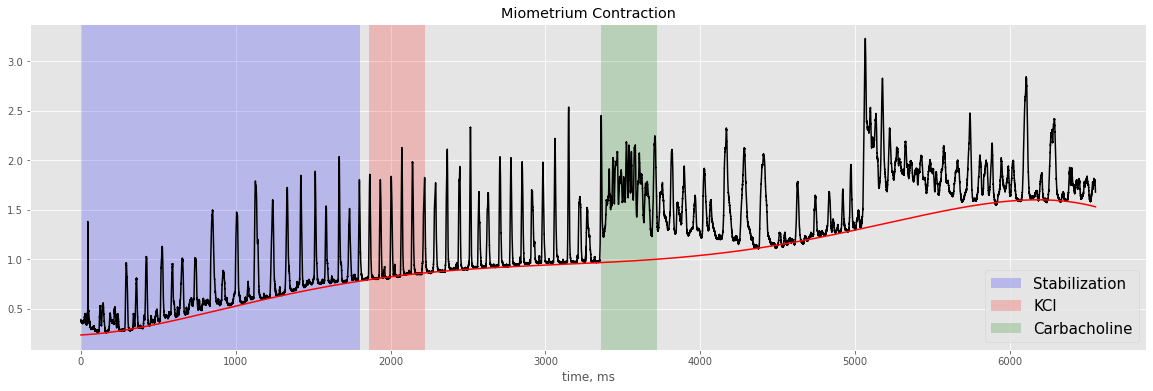

In [7]:
plt.figure(figsize=(20,6))
plt.plot(time, amps, color='k')
plt.title('Miometrium Contraction')
plt.xlabel('time, ms')
plt.axvspan(0, 30*60, facecolor='blue', edgecolor='None', 
            alpha=.2, label='Stabilization')
plt.axvspan(31*60, 37*60, facecolor='red', edgecolor='None', 
            alpha=.2, label='KCl')
plt.axvspan(56*60, 62*60, facecolor='green', edgecolor='None', 
            alpha=.2, label='Carbacholine')
plt.legend(prop={'size': 15})
plt.plot(time, baseline_values, color='r')

In [8]:
aligned_amps = amps - baseline_values

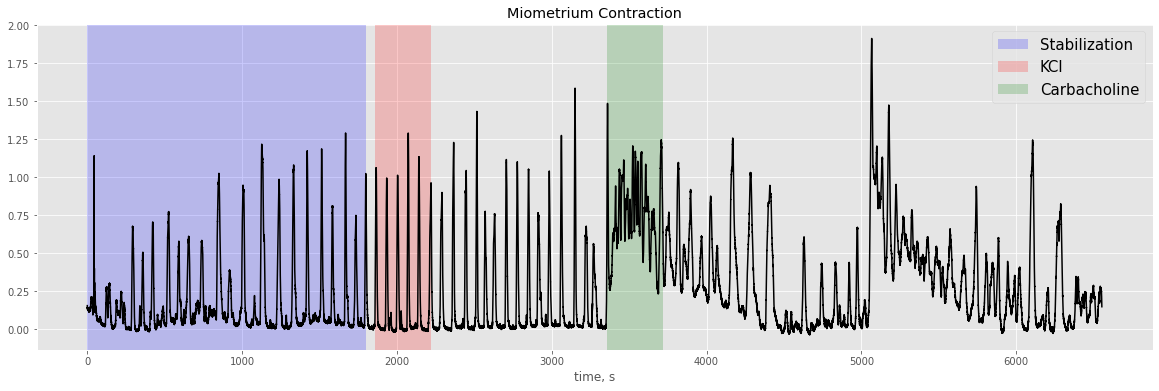

In [9]:
plt.figure(figsize=(20,6))
plt.plot(time, aligned_amps, color='k')
plt.title('Miometrium Contraction')
plt.xlabel('time, s')
plt.axvspan(0, 30*60, facecolor='blue', edgecolor='None', 
            alpha=.2, label='Stabilization')
plt.axvspan(31*60, 37*60, facecolor='red', edgecolor='None', 
            alpha=.2, label='KCl')
plt.axvspan(56*60, 62*60, facecolor='green', edgecolor='None', 
            alpha=.2, label='Carbacholine')
plt.legend(prop={'size': 15})


# Analyzing



In [10]:
from BaselineRemoval import BaselineRemoval
from scipy.signal import find_peaks, peak_widths

## Peaks Chosen by a template

In [11]:
aligned = BaselineRemoval(aligned_amps)
zhang = aligned.ZhangFit()

In [12]:
peaks, peak_values = find_peaks(zhang, height=0.5, distance=200)
widths, width_heights, left, right = peak_widths(zhang, peaks, rel_height=0.98)
half_widths, width_heights_half, left_half, right_half = peak_widths(zhang, peaks, rel_height=0.5)
left = left.astype(int)
right = right.astype(int)
left_half = left_half.astype(int)

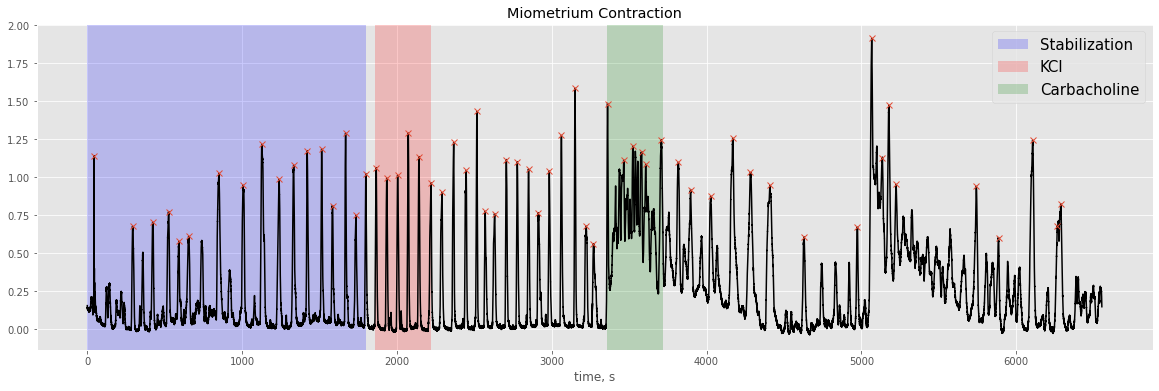

In [13]:
plt.figure(figsize=(20,6))
plt.plot(time, aligned_amps, color='k')
plt.title('Miometrium Contraction')
plt.xlabel('time, s')
plt.plot(time[peaks], aligned_amps[peaks], 'x')
plt.axvspan(0, 30*60, facecolor='blue', edgecolor='None', 
            alpha=.2, label='Stabilization')
plt.axvspan(31*60, 37*60, facecolor='red', edgecolor='None', 
            alpha=.2, label='KCl')
plt.axvspan(56*60, 62*60, facecolor='green', edgecolor='None', 
            alpha=.2, label='Carbacholine')
plt.legend(prop={'size': 15})

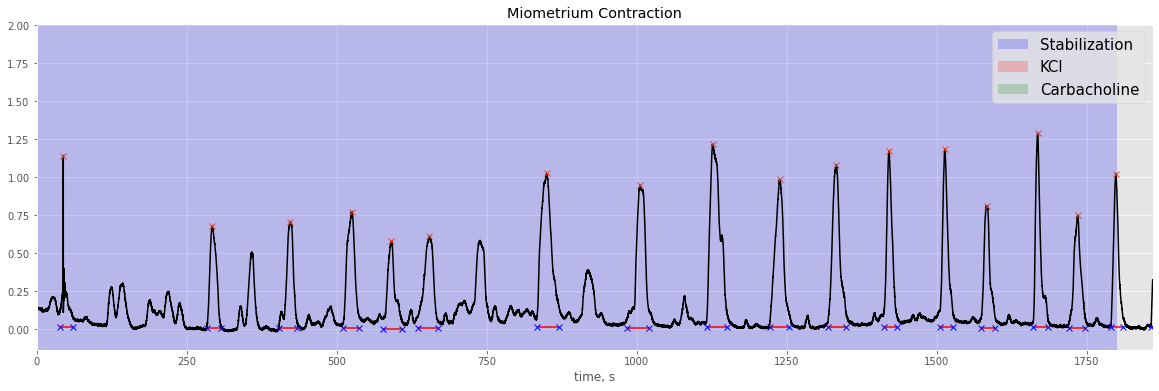

In [14]:
plt.figure(figsize=(20,6))
plt.plot(time, aligned_amps, color='k')
plt.title('Miometrium Contraction')
plt.xlabel('time, s')
plt.plot(time[peaks], aligned_amps[peaks], 'x')
plt.axvspan(0, 30*60, facecolor='blue', edgecolor='None', 
            alpha=.2, label='Stabilization')
plt.axvspan(31*60, 37*60, facecolor='red', edgecolor='None', 
            alpha=.2, label='KCl')
plt.axvspan(56*60, 62*60, facecolor='green', edgecolor='None', 
            alpha=.2, label='Carbacholine')
plt.xlim([0, 31*60])
plt.legend(prop={'size': 15})
plt.hlines(width_heights, left*dt, right*dt, color="red")
plt.plot(left*dt, width_heights, 'x', color='blue')
plt.plot(right*dt, width_heights, 'x', color='blue')

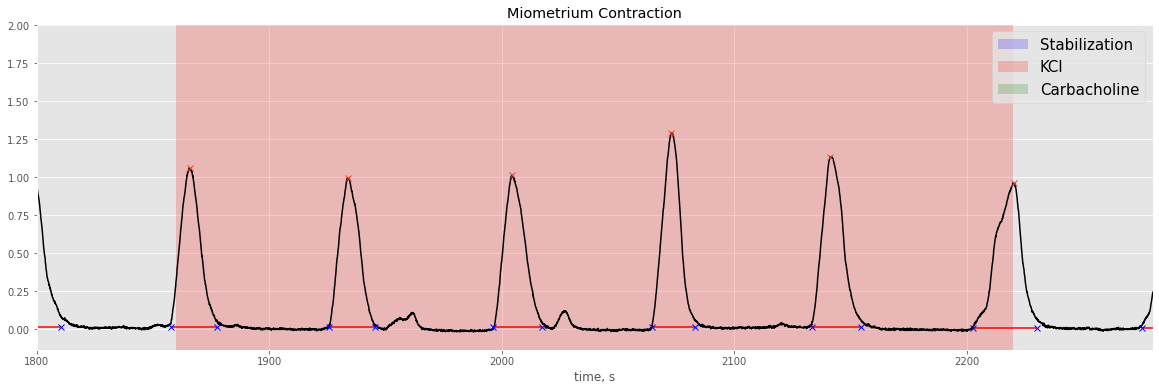

In [15]:
plt.figure(figsize=(20,6))
plt.plot(time, aligned_amps, color='k')
plt.title('Miometrium Contraction')
plt.xlabel('time, s')
plt.plot(time[peaks], aligned_amps[peaks], 'x')
plt.axvspan(0, 30*60, facecolor='blue', edgecolor='None', 
            alpha=.2, label='Stabilization')
plt.axvspan(31*60, 37*60, facecolor='red', edgecolor='None', 
            alpha=.2, label='KCl')
plt.axvspan(56*60, 62*60, facecolor='green', edgecolor='None', 
            alpha=.2, label='Carbacholine')
plt.xlim([30*60, 38*60])
plt.legend(prop={'size': 15})
plt.hlines(width_heights, left*dt, right*dt, color="red")
plt.plot(left*dt, width_heights, 'x', color='blue')
plt.plot(right*dt, width_heights, 'x', color='blue')

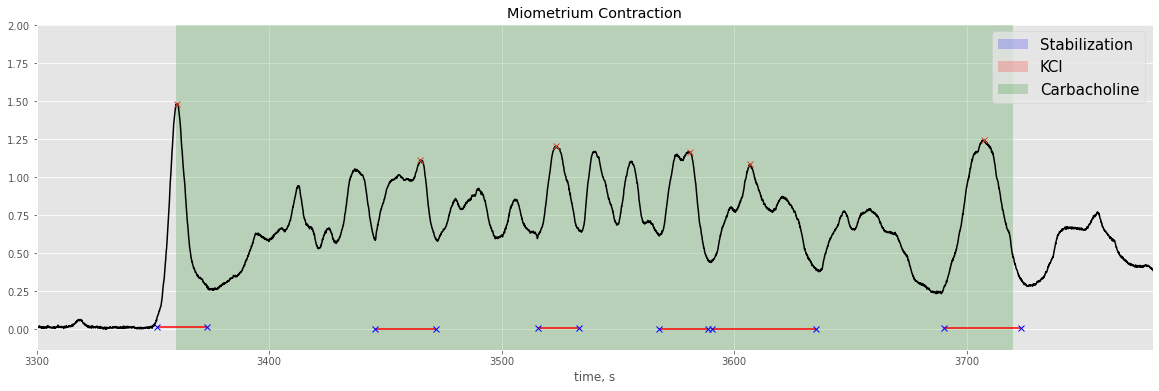

In [16]:
plt.figure(figsize=(20,6))
plt.plot(time, aligned_amps, color='k')
plt.title('Miometrium Contraction')
plt.xlabel('time, s')
plt.plot(time[peaks], aligned_amps[peaks], 'x')
plt.axvspan(0, 30*60, facecolor='blue', edgecolor='None', 
            alpha=.2, label='Stabilization')
plt.axvspan(31*60, 37*60, facecolor='red', edgecolor='None', 
            alpha=.2, label='KCl')
plt.axvspan(56*60, 62*60, facecolor='green', edgecolor='None', 
            alpha=.2, label='Carbacholine')
plt.xlim([55*60, 63*60])
plt.legend(prop={'size': 15})
plt.hlines(width_heights, left*dt, right*dt, color="red")
plt.plot(left*dt, width_heights, 'x', color='blue')
plt.plot(right*dt, width_heights, 'x', color='blue')

## Calculating Peak Amplitudes, Half-Widths and Areas

In [17]:
from scipy.integrate import simps
from scipy.stats import sem

In [18]:
g = {'control': [], 'KCl': [], 'Carbacholine': []}
gms = {'control': [], 'KCl': [], 'Carbacholine': []}
hw = {'control': [], 'KCl': [], 'Carbacholine': []}
i=0

for peak in peaks:
    a = aligned_amps[left[i]:right[i]]
    t = time[left[i]:right[i]]
    h = half_widths[i]*dt*1000
    area = simps(a, 1000*t)
    if max(t) <= 30*60:
        g['control'].append(aligned_amps[peak])
        gms['control'].append(area)
        hw['control'].append(h)
    elif max(t) <= 37*60:
        g['KCl'].append(aligned_amps[peak])
        gms['KCl'].append(area)
        hw['KCl'].append(h)
    elif 56*60 < max(t) <= 62*60:
        g['Carbacholine'].append(aligned_amps[peak])
        gms['Carbacholine'].append(area)
        hw['Carbacholine'].append(h)
    i+=1

In [19]:
y = [np.mean(g['control']), np.mean(g['KCl']), np.mean(g['Carbacholine'])]
labels = ['Control', 'KCL', 'Carbacholine']
x = np.arange(len(labels))
error = [sem(g['control']), sem(g['KCl']), sem(g['Carbacholine'])]

In [20]:
table = {'Application': labels, 
         'Peak Amplitude, g': y, 
         'Half-widths, ms': [np.mean(hw['control']), np.mean(hw['KCl']), np.mean(hw['Carbacholine'])], 
         'Area, gms': [np.mean(gms['control']), np.mean(gms['KCl']), np.mean(gms['Carbacholine'])]}
df = pd.DataFrame(table)
display(df)

,Application,"Peak Amplitude, g","Half-widths, ms","Area, gms"
0,Control,0.934755,12028.780077,12741.957410
1,KCL,1.086528,9355.738060,10683.425768
2,Carbacholine,1.210694,15589.577371,21465.052513


## Average Peak Amplitudes Errorbars

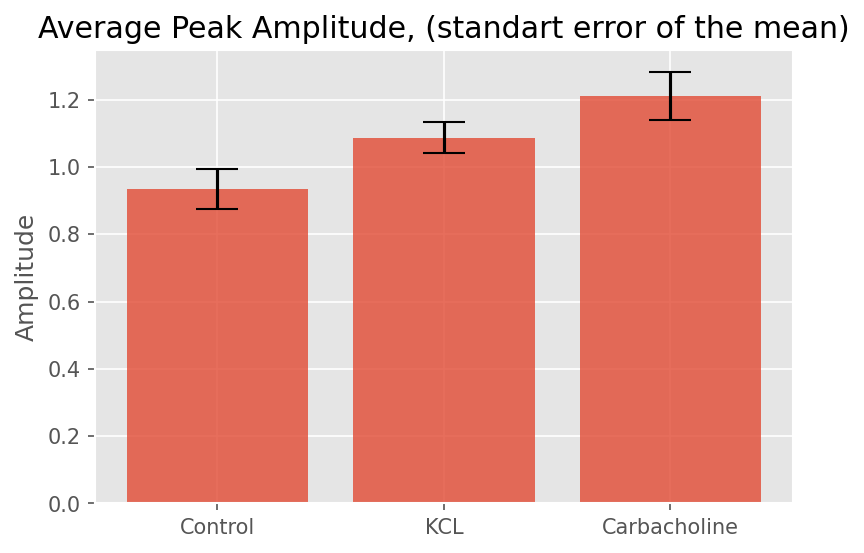

In [21]:
fig, ax = plt.subplots(dpi=150);
ax.bar(x, y, yerr=error, align='center', alpha=0.8, ecolor='black', capsize=10);
ax.set(ylabel='Amplitude');
ax.set_xticks(x);
ax.set_title('Average Peak Amplitude, (standart error of the mean)');
ax.set_xticklabels(labels)
plt.savefig('errorbars.pdf', dpi=150)